In [3]:
!pip install seaborn

In [5]:
!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
laptop_data =pd.read_csv('SHARE/datasets/laptops.csv',encoding='ISO-8859-1',index_col=0)

In [17]:
laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [19]:
laptop_data.shape

(1303, 12)

In [21]:
laptop_data.drop(['Product','ScreenResolution','Cpu','Memory','Gpu','Weight'],inplace=True ,axis=1)

In [22]:
laptop_data.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price_euros
58,Asus,Notebook,15.6,4GB,Windows 10,586.19
898,Asus,Gaming,17.3,12GB,Windows 10,1369.90
276,Asus,Gaming,17.3,16GB,Windows 10,1549.00
431,Dell,Gaming,17.3,16GB,Windows 10,2799.00
959,Lenovo,Gaming,15.6,16GB,Windows 10,999.00
870,Lenovo,Notebook,15.6,4GB,No OS,469.00
536,Dell,Notebook,15.6,8GB,Windows 10,1377.00
631,HP,Notebook,15.6,4GB,Windows 7,932.00
96,Asus,Ultrabook,14.0,8GB,Windows 10,1049.00
881,Lenovo,Notebook,15.6,4GB,Windows 10,1055.00


In [23]:
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [24]:
laptop_data.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

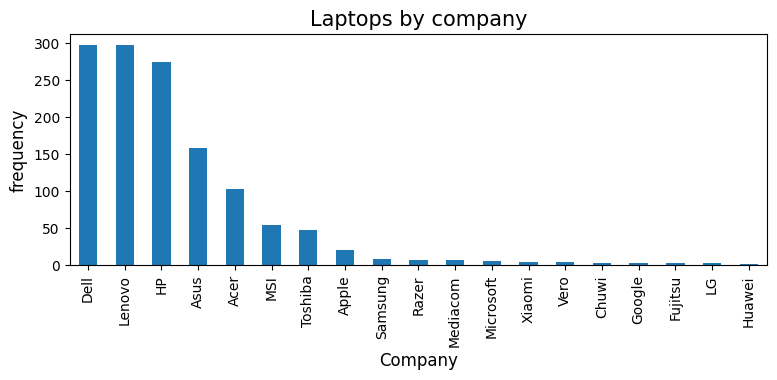

In [32]:
plt.figure(figsize=(9,3))
laptop_data['Company'].value_counts().plot(kind='bar')

plt.title('Laptops by company',fontsize=15)

plt.xlabel('Company',fontsize=12)
plt.ylabel('frequency',fontsize=12)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

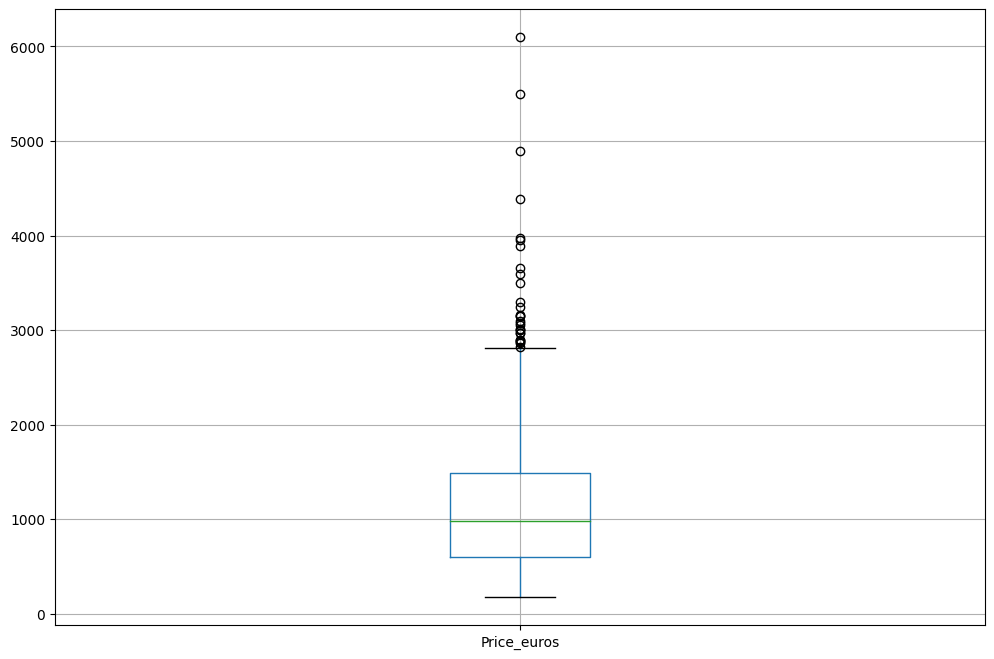

In [33]:
plt.figure(figsize=(12,8))
laptop_data[['Price_euros']].boxplot()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

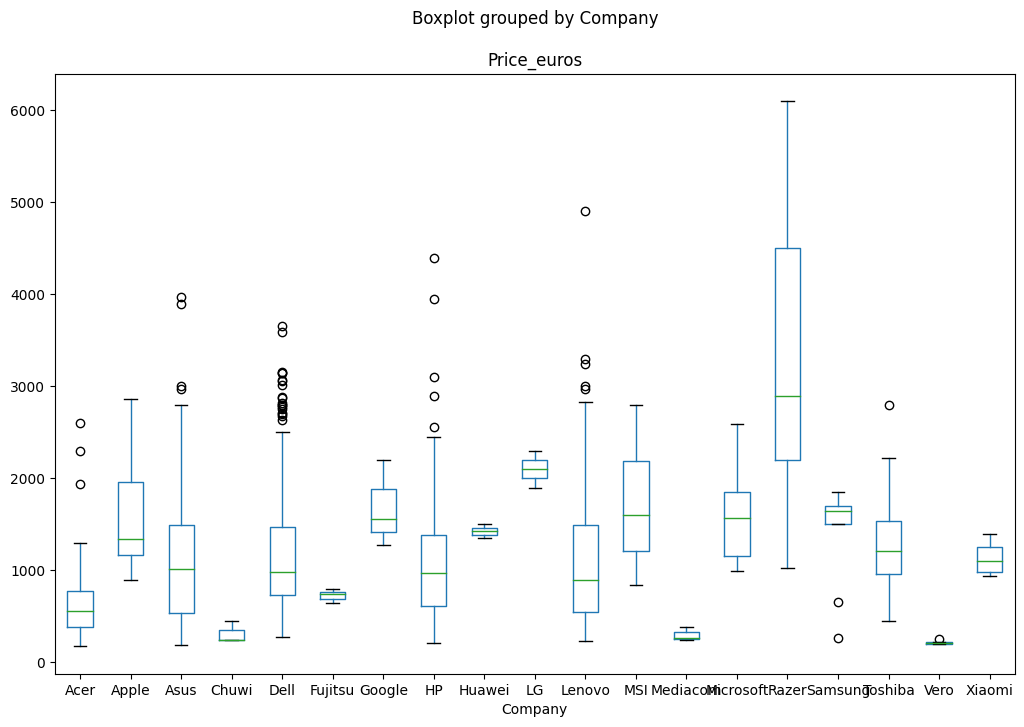

In [49]:
laptop_data.boxplot(by='Company',column=['Price_euros'],grid=False,figsize=(12,8))

plt.show

C:\Users\Anirudh\.conda\envs\r_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Anirudh\.conda\envs\r_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


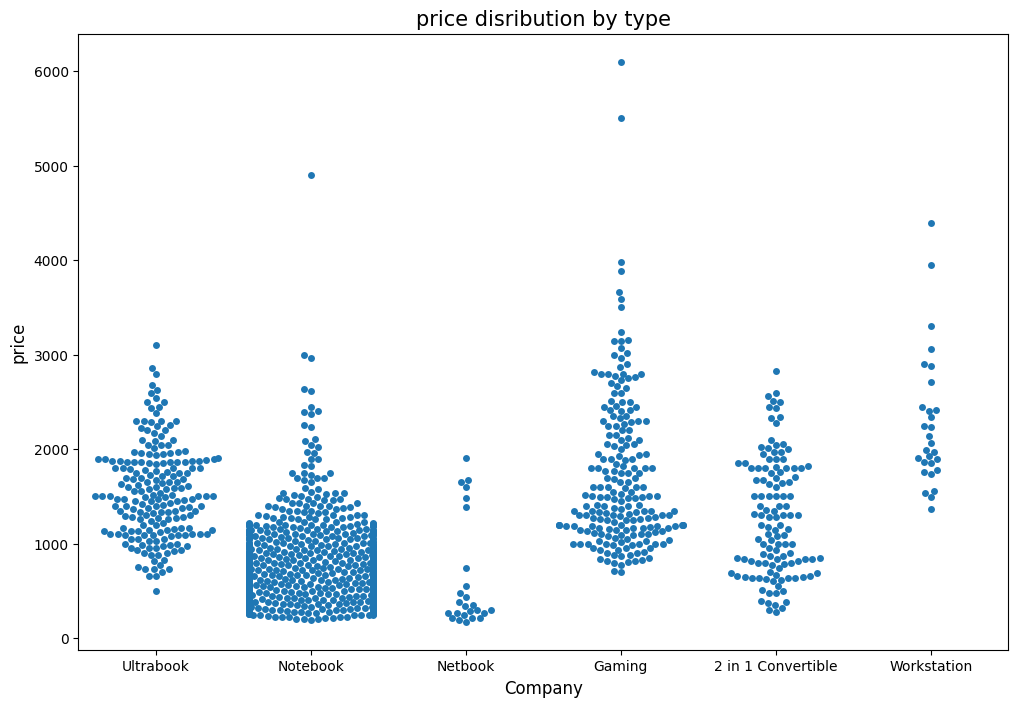

In [52]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='TypeName',y='Price_euros',data=laptop_data)

plt.title('price disribution by type',fontsize=15)

plt.xlabel('Company',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.show()

In [53]:
 from sklearn.preprocessing import LabelEncoder
 label_encoder=LabelEncoder()
 laptop_data['TypeName']=label_encoder.fit_transform(laptop_data['TypeName'])

In [54]:
laptop_data.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,4,13.3,8GB,macOS,1339.69
2,Apple,4,13.3,8GB,macOS,898.94
3,HP,3,15.6,8GB,No OS,575.00
4,Apple,4,15.4,16GB,macOS,2537.45
5,Apple,4,13.3,8GB,macOS,1803.60


In [55]:
dummy_laptop_data=pd.get_dummies(laptop_data)
dummy_laptop_data.head()

,TypeName,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Ram_8GB,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1,4,13.3,1339.69,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,4,13.3,898.94,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,3,15.6,575.00,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,4,15.4,2537.45,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,4,13.3,1803.60,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [58]:
x=dummy_laptop_data.drop('Price_euros',axis=1)
y=dummy_laptop_data['Price_euros']

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [61]:
x_train.shape ,x_test.shape

((1042, 39), (261, 39))

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression=LinearRegression()

linear_regression.fit(x_train,y_train)

LinearRegression()

In [80]:
linear_regression.score(x_train,y_train)

0.6849732127933674

In [81]:
y_pred=linear_regression.predict(x_test)
r2_score(y_test,y_pred)

0.6137201342802905

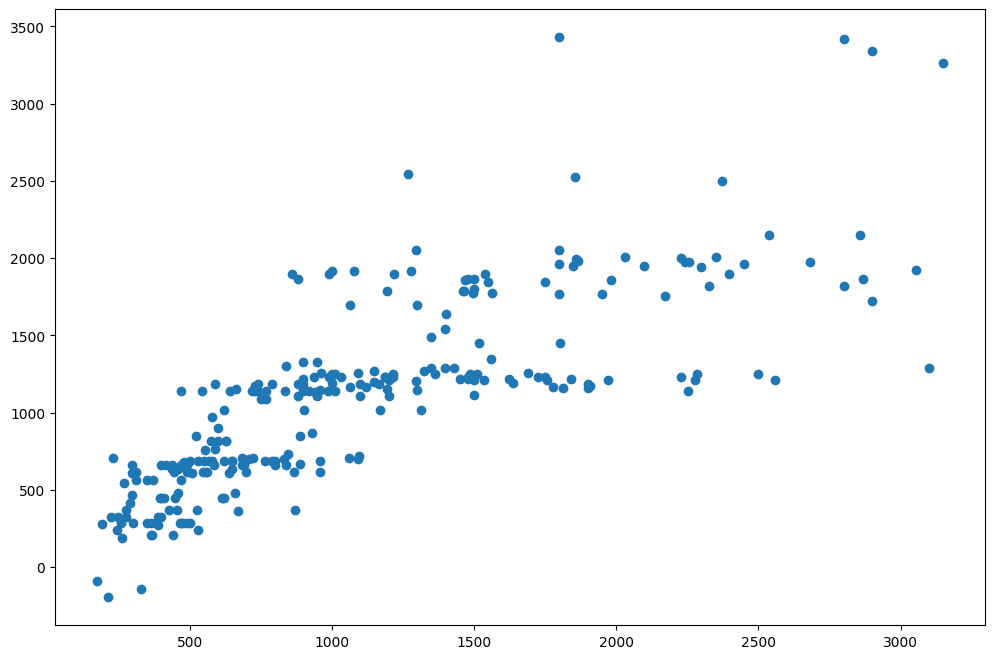

In [83]:
plt.figure(figsize=(12,8))

plt.scatter(y_test,y_pred)
plt.show()

In [84]:
!pip install ipywidgets

     ---------------------------------------- 0.0/138.3 kB ? eta -:--:--
     -------- ---------------------------- 30.7/138.3 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 138.3/138.3 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------- ----------------------------- 0.5/2.1 MB 11.3 MB/s eta 0:00:01
     ------------------------- -------------- 1.4/2.1 MB 14.3 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 16.8 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 15.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/198.2 kB ? eta -:--:--
     ------------------------------------- 198.2/198.2 kB 12.5 MB/s eta 0:00:00


In [208]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [86]:
from ipywidgets import interact ,interactive ,fixed ,interact_manual
import ipywidgets as widgets

In [105]:
w=widgets.IntSlider(value=10,min=-5,max=20,step=1,description='Raneg slider',continuous_update=False,orientation='horizontal')

In [111]:
w

IntSlider(value=10, continuous_update=False, description='Raneg slider', max=20, min=-5)

In [112]:
r=widgets.IntRangeSlider(value=[10,100],min=0,max=10000,step=1,description='Price range',orientation='horizontal')

In [113]:
r

IntRangeSlider(value=(10, 100), description='Price range', max=10000)

In [121]:
p=widgets.IntProgress(value=70,min=0,max=100,step=1,description='Loading',bar_style='success',orientation='horizontal')

In [123]:
p

IntProgress(value=70, bar_style='success', description='Loading')

In [137]:
import time
for i in range (0,110,10):
    p.value=i
    time.sleep(1)

In [143]:
widgets.BoundedIntText(value=5,min=0,max=100,step=1,description='text:',disabled=False)

BoundedIntText(value=5, description='text:')

In [145]:
widgets.Checkbox(alue=False,description='check me')

Checkbox(value=False, description='check me')

In [154]:
dd=widgets.Dropdown(options=['None','0','1','2','3'],value='None',description='number',disableed=False)

In [152]:
dd

Dropdown(description='number', options=('None', '0', '1', '2', '3'), value='None')

In [162]:
rb=widgets.RadioButtons(options=['None','hp','asus','dell'],value='None',description='laptop choice')

In [163]:
rb

RadioButtons(description='laptop choice', options=('None', 'hp', 'asus', 'dell'), value='None')

In [164]:
rb.value

'hp'

In [166]:
button=widgets.Button(description='Happiness Button',button_style='success',
tooltip='good things will happen:-)',icon='check')

In [167]:
button

Button(button_style='success', description='Happiness Button', icon='check', style=ButtonStyle(), tooltip='goo…

you clicke good things are about to happen
Happiness Button
you clicke good things are about to happen
Happiness Button


In [169]:
def button_click_event_handler(button):
    print('you clicke good things are about to happen')
    print(button.description)

In [170]:
button.on_click(button_click_event_handler)

In [181]:
play=widgets.Play(value=50,min=0,max=100,step=1,description="Press Play")

In [182]:
play

Play(value=50, description='Press Play')

In [201]:
slider=widgets.IntSlider()

In [202]:
slider

In [186]:
widgets.jslink((play,'value'),(slider,'value'))

Link(source=(Play(value=50, description='Press Play'), 'value'), target=(IntSlider(value=0), 'value'))

In [189]:
widgets.HBox([play,slider])

In [190]:
def f(x):
    return x

interact(f,x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [191]:
interact(f,x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [200]:
interact(f,x='hello widgets')

In [198]:
@interac(x=True,y=5.0)
def g(x,y):
    return(x,y)

In [211]:
def h(p,q):
    return(p,q)


interact (h,p=5,q=fixed(20))

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.h(p, q)>

In [212]:

def f(m,b):
     plt.figure(2)
     x=np.linspace(-10,10,num=1000)
     plt.plot(x,m * x+b)
     plt.ylim(-5,5)
     plt.show()

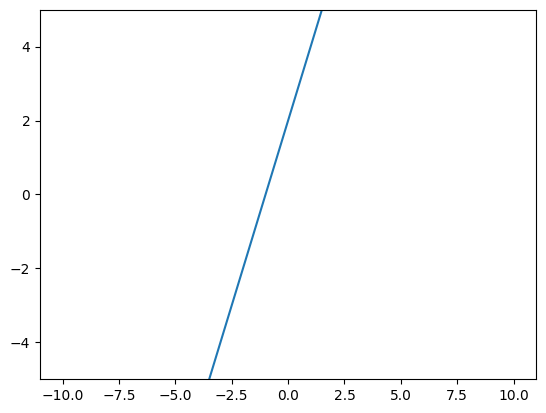

In [214]:
f(2,2)

In [215]:
def f(m,b):
     plt.figure(2)
     x=np.linspace(-10,10,num=1000)
     plt.plot(x,m * x+b)
     plt.ylim(-5,5)
     plt.show()

interactive_plot=interactive(f,m=(-2.0,2.0),b=(-3.0,3,0.5))

In [217]:
output =interactive_plot.children[-1]
output.layout.height='350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [221]:
from IPython.display import display

text = widgets.Text()
display(text)

def make_upper_case(input_text):
    text.value=input_text.value.upper()
    print(text.value)
    
text.on_submit(make_upper_case)


Text(value='')

C:\Users\Anirudh\AppData\Local\Temp\ipykernel_10612\1238428364.py:11: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  text.on_submit(make_upper_case)


In [224]:
house_data=pd.read_csv('share/datasets/HousingData.csv',
					   names=['CrimeRate','ZoneRatio','IndusRatio'
					   ,'AlongRiver','NO2Level','RoomPerHouse'
					   ,'OldHomeRatio','DisFormCenter','RoadAccessIndex'
					   ,'PropTaxRate','PupilTeacherRatio','MedianHomeValue'],
					   header=1)

In [229]:
house_data=house_data[['AlongRiver','RoomPerHouse','PropTaxRate','PupilTeacherRatio','MedianHomeValue']]
house_data.head()


,AlongRiver,RoomPerHouse,PropTaxRate,PupilTeacherRatio,MedianHomeValue
0,0.0,6.421,242,17.8,21.6
1,0.0,7.185,242,17.8,34.7
2,0.0,6.998,222,18.7,33.4
3,0.0,7.147,222,18.7,36.2
4,0.0,6.430,222,18.7,28.7


In [230]:

@interact 
def show_house_data_more_then(column='PupilTeacherRatio',x=10):
    return house_data.loc[house_data[column]>x]

interactive(children=(Text(value='PupilTeacherRatio', description='column'), IntSlider(value=10, description='…

In [231]:
import os
from IPython.display import Image

fdir='share/datasets/Nature/'

@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file))

interactive(children=(Dropdown(description='file', options=('Nature01.jpg', 'Nature02.jpg', 'Nature03.jpg'), v…